# Morphological Characteristics of Iris Flowers

*The code performs a comprehensive analysis of the morphological characteristics of iris flowers using Python and data visualization tools. The dataset is loaded and corrected for integrity. After providing an overview of the classes, the code focuses on visualizing the flowers' characteristics with color-coded plots and lines for comparison. Correlation analyses and exact correlation values are used to highlight relationships, and linear regression with Ordinary Least Squares (OLS) models petal length based on width. The code provides a deep understanding of morphological relationships through well-chosen visualizations and statistics.*

# Imports and Data Loading:

- *Importing necessary libraries and loading the Iris dataset*

In [1]:
"""Imports and Data Loading"""

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols 
import scipy.stats as scs
import numpy as np

# Load the Iris dataset
file_path = os.path.realpath("C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Statistical__methods\\Labb\\data\\iris.csv")
iris = pd.read_csv(file_path)

# Displaying Basic Information of the Dataset:

- *Showing the first rows of the dataset*
- *Checking and handling any missing values*
- *Removing extra spaces from column names*

In [2]:
# Display the first rows of the dataset
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for missing values
iris.isnull().any()

sepal_length     False
 sepal_width     False
 petal_length    False
 petal_width     False
 class           False
dtype: bool

In [4]:
# Remove spaces from column names
iris.columns = iris.columns.str.strip()

# Statistical Summary for Each Class:

- *Grouping the dataset by class and displaying a statistical summary for each class*

In [5]:
# Group the dataset by class and display statistical summary for each class
grouped_class = iris.groupby("class")
for class_value, data in grouped_class:
    print(f"{class_value.capitalize()}:")
    display(data.describe())

Iris-setosa:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Iris-versicolor:


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Iris-virginica:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [6]:
# The mean values for each class
# Display mean values for numeric columns grouped by class
print(iris.groupby('class').mean(numeric_only=True))

                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


# Visualization of Morphological Characteristics:

- *Creating color-coded plots and lines to compare morphological characteristics*
- *Conducting correlation analyses and displaying exact correlation values*
- *Applying linear regression with OLS models to predict petal length based on width*

- *Graphical Visualization*:

    * *Petal Measurements Visualization:* Provides an overview of petal measurements, showing the relationship between petal width and length, color-coded by class.
        
    * *Regression Line and Scatter Plot for Petal Measurements:* Displays a regression line and scatter plot for petal width and length, illustrating the linear relationship between the two.
    
    * *Regression Line with Different Colors for Each Class - Petal Measurements:* Utilizes different colors for each class in the regression line, offering insights into class-specific trends in petal measurements.

    * *Scatter Plot for Sepal Measurements:* Depicts the relationship between sepal width and length through a scatter plot, providing a visual representation of sepal measurements.
    
    *  *Regression Line for Sepal Measurements:* Shows a regression line and scatter plot for sepal width and length, revealing the linear relationship between these morphological characteristics.
    
    * *Regression Lines for Sepal Measurements by Class:* Displays regression lines for sepal width and length, categorized by class, allowing for a class-specific analysis of sepal measurements.

    * *Pair Plot for Entire Dataset:* Generates a comprehensive pair plot for the entire dataset, offering an overview of relationships between all pairs of features.

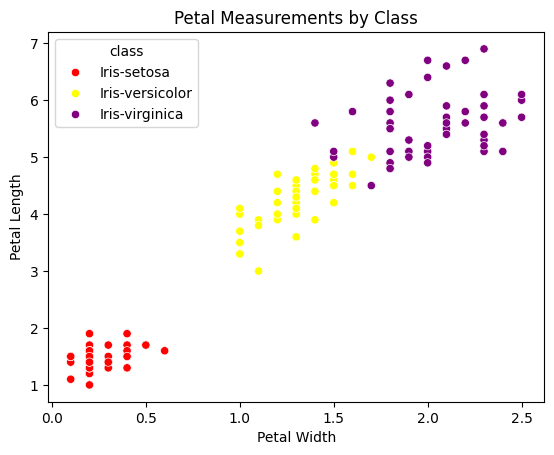

In [7]:
"""Petal Measurements Visualization"""

# Create a scatter plot for petal_width and petal_length, colored by class
# Use a custom color palette for each class

custom_palette = {"Iris-setosa": "red", "Iris-versicolor": "yellow", "Iris-virginica": "purple"}
sns.scatterplot(data=iris, x="petal_width", y="petal_length", hue="class", palette=custom_palette)
plt.title("Petal Measurements by Class")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.savefig("visualization/Petal_Measurements_by_Class.png", bbox_inches="tight")
plt.show()

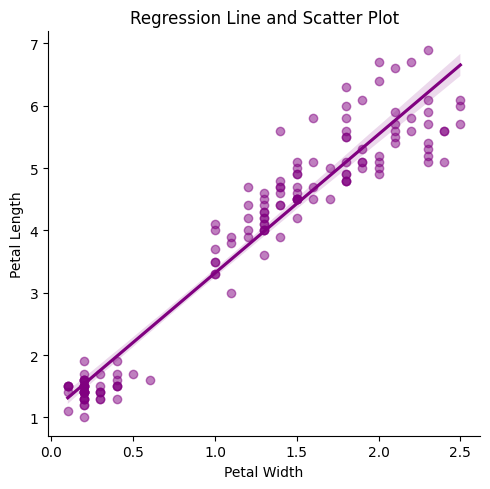

In [8]:
"""Regression Line and Scatter Plot for Petal Measurements"""

# Use lmplot to create a regression line and scatter plot for petal_width and petal_length
sns.lmplot(data=iris, x="petal_width", y="petal_length", scatter_kws={"alpha": 0.5, "color": "purple"}, line_kws={"color": "purple"})
plt.title("Regression Line and Scatter Plot")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.tight_layout()
plt.savefig("visualization/Regression_Line_and_Scatter_Plot.png", bbox_inches="tight")
plt.show()

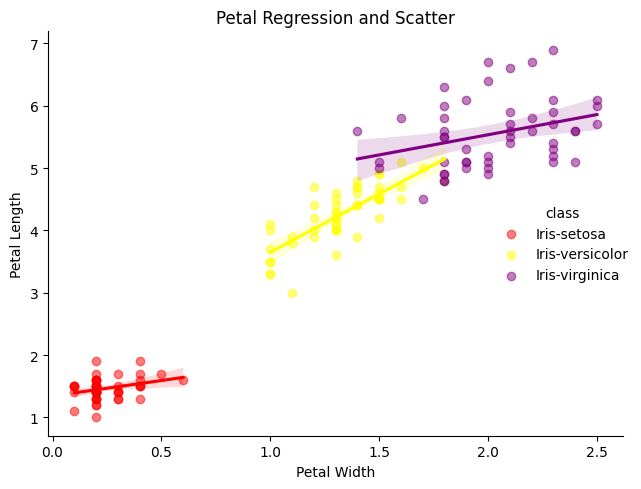

In [9]:
"""Regression Line with Different Colors for Each Class - Petal Measurements"""

# Use lmplot to create a regression line with different colors for each class
sns.lmplot(data=iris, x="petal_width", y="petal_length", hue="class", palette=custom_palette, scatter_kws={"alpha": 0.5})
plt.title("Petal Regression and Scatter")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.tight_layout()
plt.savefig("visualization/Petal_Regression_and_Scatter.png", bbox_inches="tight")
plt.show()

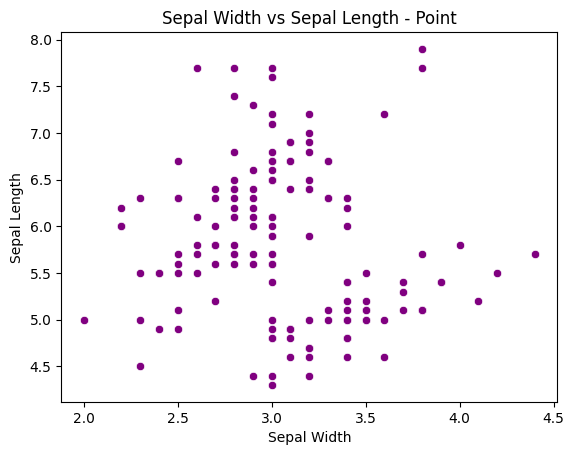

In [10]:
"""Scatter Plot for Sepal Measurements"""

# Create a scatter plot for sepal_width and sepal_length
sns.scatterplot(data=iris, x="sepal_width", y="sepal_length", color="purple")
plt.title("Sepal Width vs Sepal Length - Point")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.savefig("visualization/Sepal_Width_vs_Sepal_Length_Point.png", bbox_inches="tight")
plt.show()

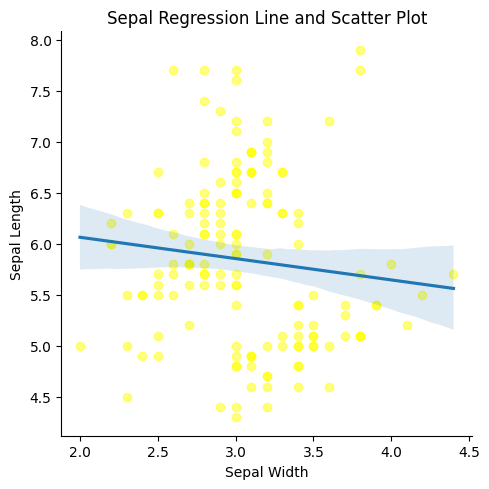

In [11]:
"""Regression Line for Sepal Measurements"""

# Use lmplot to create a regression line and scatter plot for sepal_width and sepal_length
sns.lmplot(data=iris, x="sepal_width", y="sepal_length", scatter_kws={"alpha": 0.5, "color": "yellow"})
plt.title("Sepal Regression Line and Scatter Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.tight_layout()
plt.savefig("visualization/Sepal_Regression_Line_and_Scatter_Plot.png", bbox_inches="tight")
plt.show()

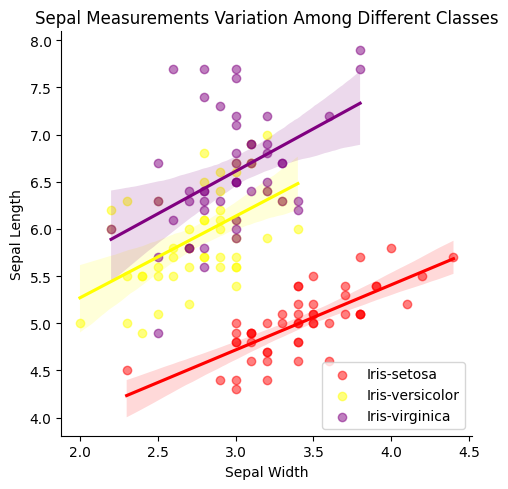

In [12]:
"""Regression Lines for Sepal Measurements by Class"""

# Use lmplot to create regression lines for sepal_width and sepal_length, categorized by class
sns.lmplot(data=iris, x="sepal_width", y="sepal_length", hue="class", palette=custom_palette, scatter_kws={"alpha": 0.5}, legend=False)
plt.title("Sepal Measurements Variation Among Different Classes")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("visualization/Sepal_Measurements_Variation_Among_Different_Classes.png", bbox_inches="tight")
plt.show()

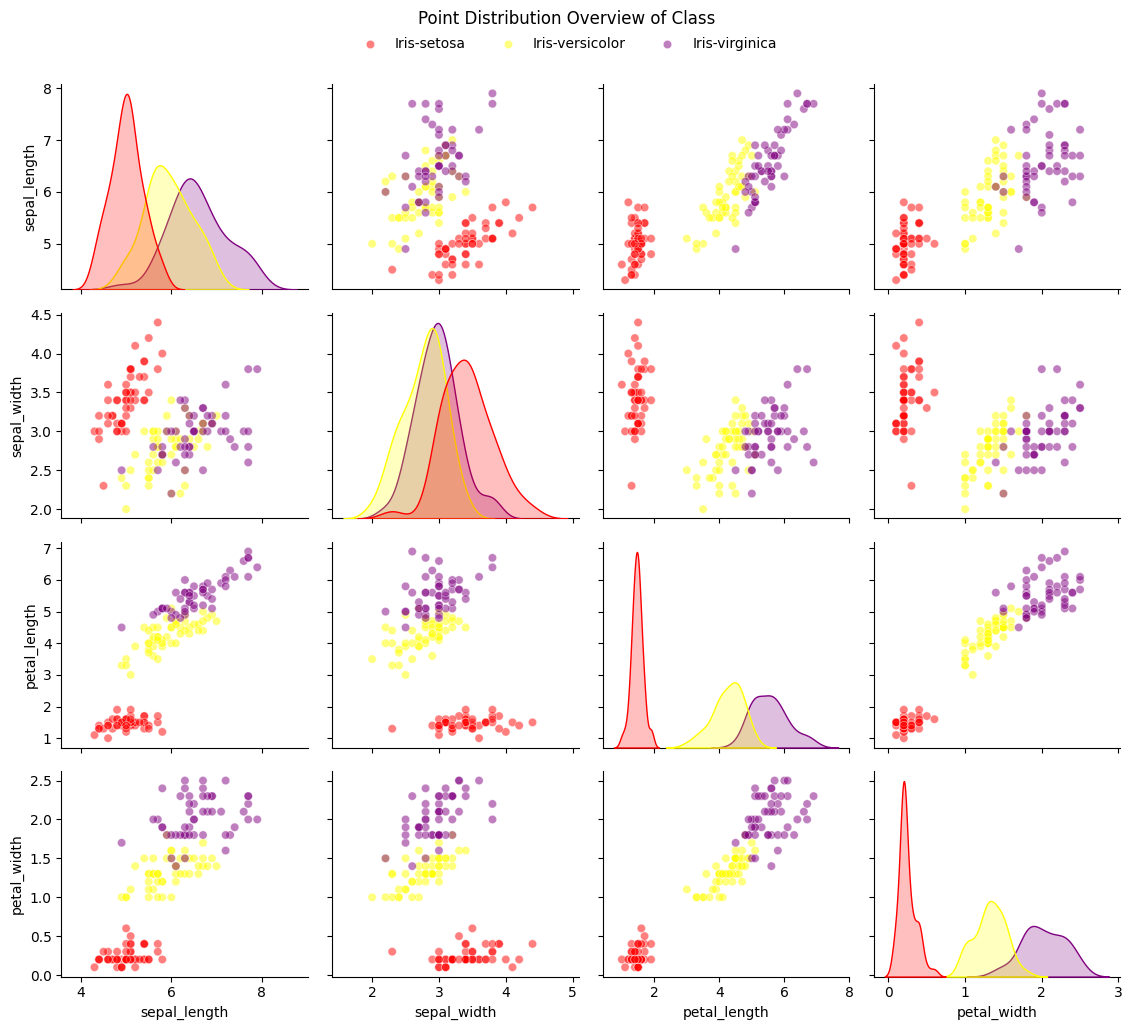

In [13]:
"""Pair Plot for Entire Dataset"""

# Generate a pairplot for the entire dataset, creating a grid of all columns against each other
chart = sns.pairplot(iris, hue="class", palette=custom_palette, plot_kws=dict(alpha=0.5))
sns.move_legend(chart, "upper center", bbox_to_anchor=(0.5, 1.01), ncol=3, title="")
plt.suptitle("Point Distribution Overview of Class", y=1.025)
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("visualization/Point_Distribution_Overview_of_Class.png", bbox_inches="tight")
plt.show()

# Correlation Analysis:

- *Calculating and visualizing correlation matrices for the entire dataset and each class separately*
- *Focuses on exploring the relationships between different features in the Iris dataset*
- *The analysis is performed for both the entire dataset and individual classes*

- *Exact Values of Correlations (r-squared)* : 
    Provides the precise numerical values of correlations (r-squared) between features, offering a quantitative perspective on relationships.

- *Petal and Sepal Correlation Tests* : 
    Conducts correlation tests specifically for petal and sepal measurements, highlighting the strength and significance of their relationships.

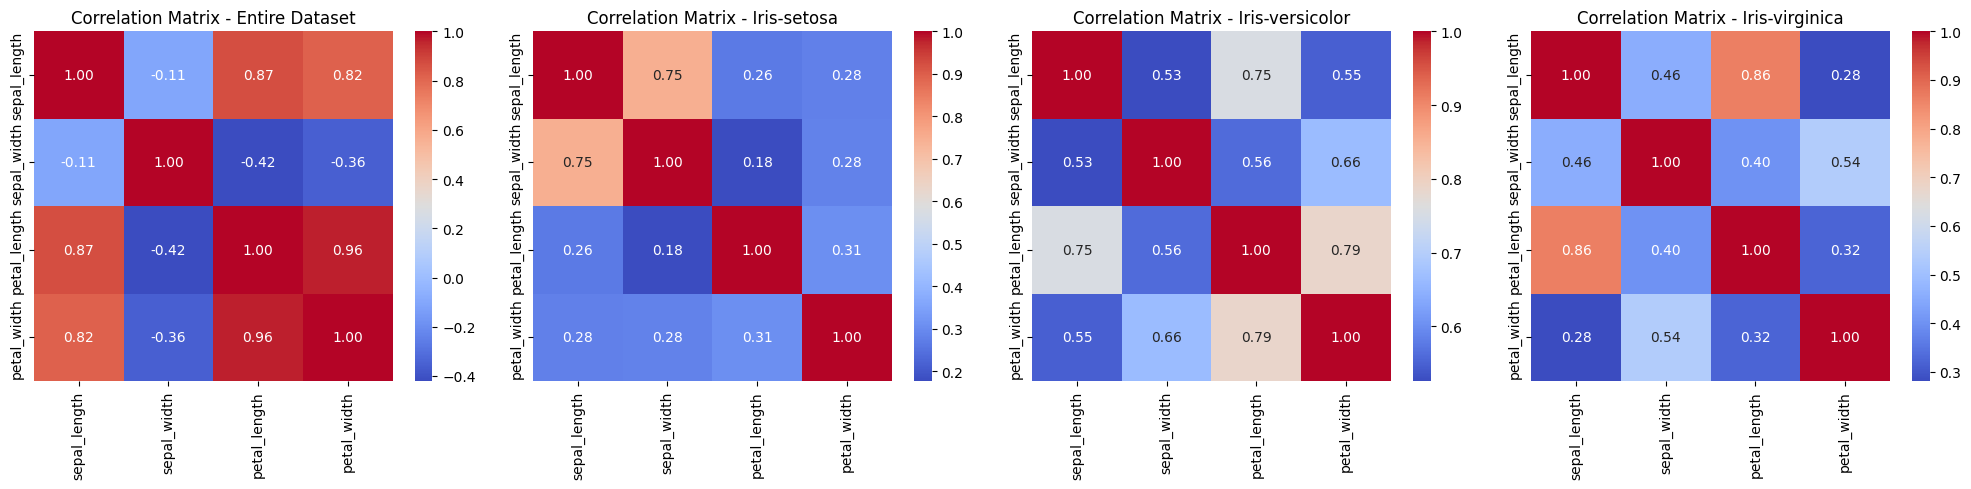

In [14]:
# Calculate and visualize correlation matrices for the entire dataset and each class
corr = iris.corr(numeric_only=True)
class_corr = iris.groupby("class").apply(lambda x: x.corr(numeric_only=True))
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Heatmap for Entire Dataset
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix - Entire Dataset")

# Heatmaps for Each Class
for i, class_name in enumerate(iris['class'].unique()):
    sns.heatmap(class_corr.loc[class_name], annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i+1])
    axes[i+1].set_title(f"Correlation Matrix - {class_name.capitalize()}")

plt.tight_layout()
plt.savefig("visualization/Exploring_Correlation_Patterns.png", bbox_inches="tight")
plt.show()

In [15]:
"""Exact Values of Correlations (r-squared)"""

# Display the exact values of correlations (r-squared)
print(corr**2)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.011962      0.759955     0.669048
sepal_width       0.011962     1.000000      0.176834     0.127124
petal_length      0.759955     0.176834      1.000000     0.926901
petal_width       0.669048     0.127124      0.926901     1.000000


In [16]:
"""Petal and Sepal Correlation Tests"""

# Perform correlation tests for petal and sepal measurements
r, p = scs.pearsonr(iris["petal_width"], iris["petal_length"])
print(f"Petal correlation: r = {round(r, 3)}, p = {p}")

r, p = scs.pearsonr(iris["sepal_width"], iris["sepal_length"])
print(f"Sepal correlation: r = {round(r, 3)}, p = {p}")

Petal correlation: r = 0.963, p = 5.776660988495174e-86
Sepal correlation: r = -0.109, p = 0.18276521527136963


# Linear Regression with OLS for Petals:

- *Training a linear regression model to predict petal length based on petal width*
- *Presenting the results and the summary of the model*

In [17]:
# Fit a linear regression model using OLS for petal measurements
formula = "petal_length ~ petal_width"
model = ols(formula, data=iris).fit()
# Display the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           5.78e-86
Time:                        11:25:42   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

# In-Sample Predictions of Randomly Generated Points:

- *Generating random points and predicting petal length with the trained OLS model*
- *Displaying both the entire dataset and only the predicted points*

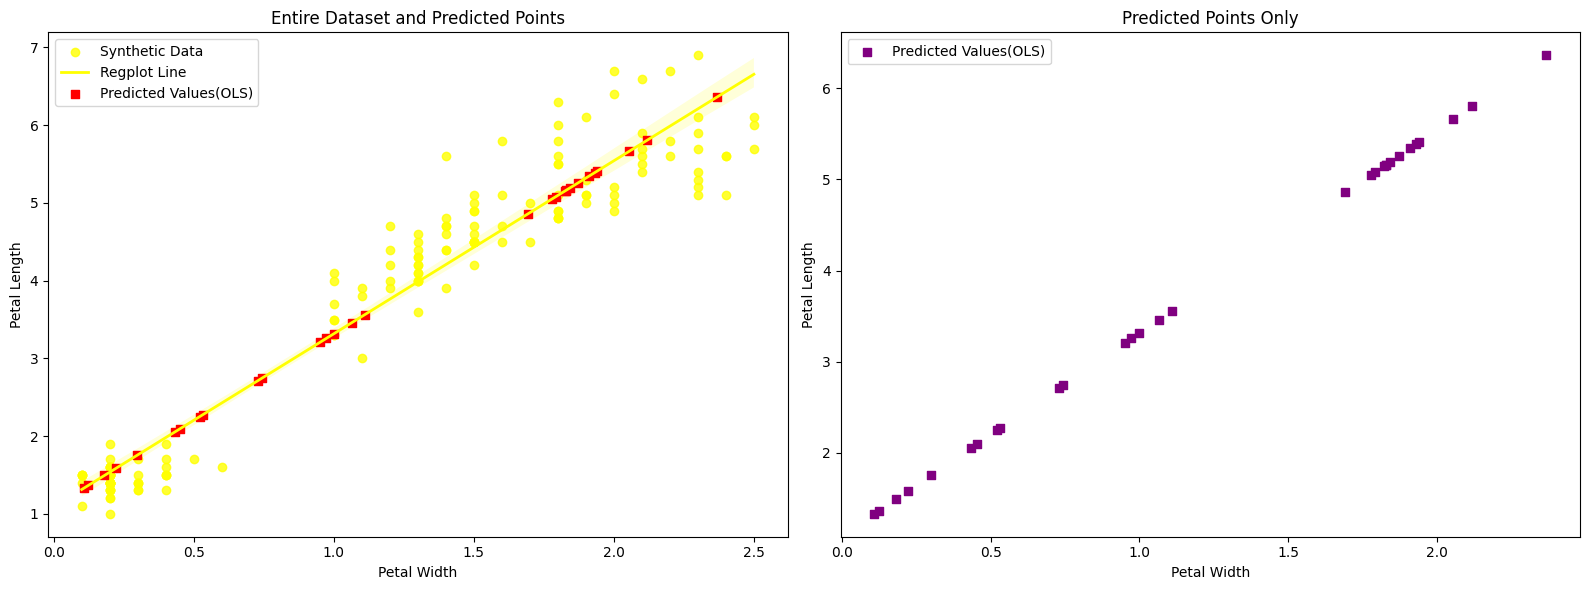

In [18]:
# Create a new figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Generate random points and predict petal length using the trained OLS model
random_points = pd.DataFrame(np.random.uniform(min(iris["petal_width"]), max(iris["petal_width"]), 30), columns=["petal_width"])
ypred = model.predict(random_points)

# Plot the entire dataset and the predicted points
sns.regplot(data=iris, x="petal_width", y="petal_length", label="Synthetic Data", line_kws={"linewidth": 2, "label": "Regplot Line"}, color="yellow", ax=axes[0])
axes[0].scatter(random_points["petal_width"], ypred, label="Predicted Values(OLS)", color="red", marker="s")
axes[0].set_title("Entire Dataset and Predicted Points")
axes[0].set_xlabel("Petal Width")
axes[0].set_ylabel("Petal Length")
axes[0].legend()

# Plot only the predicted points in the second subplot
axes[1].scatter(random_points["petal_width"], ypred, label="Predicted Values(OLS)", color="purple", marker="s")
axes[1].set_title("Predicted Points Only")
axes[1].set_xlabel("Petal Width")
axes[1].set_ylabel("Petal Length")
axes[1].legend()

# Adjust layout for a better appearance
plt.tight_layout()

# Save the plot as an image file
plt.savefig("visualization/Predicting_Petal_Length_with_In_Sample_Points_Separate.png", bbox_inches="tight")

# Show the plot
plt.show()

# Morphological Characteristics of Iris Flowers



# Introduction:

![Sample Image](visualization/82-826789_iris-iris-sepal-and-petal.png)

*This report presents a correlation analysis of iris petals and sepals, exploring the significant correlation between their width and length. The dataset includes measurements from 150 iris flowers categorized into three subspecies: Iris Setosa, Iris Versicolor, and Iris Virginica, with four measurements each, including petal and sepal width and length.*


## Hypotheses

To guide the analysis, two hypotheses were formulated:

- **Null Hypothesis ($H_{0a}$):** No significant correlation exists between petal length ($X$) and width ($Y$).

- **Alternative Hypothesis ($H_{1a}$):** A significant correlation exists between petal length ($X$) and width ($Y$).




## Method and Analysis Approach

The analysis involves:

- Examining scatter distributions of petals and sepals for potential linear relationships.

- Calculating bivariate correlation Pearson's $r$ between width and length for both petals and sepals.

- Evaluating the significance of the correlation based on $r$- and $p$-values.

- In case of a significant correlation, using a linear regression model ($Y = \beta_0 + \beta_1X + \varepsilon$) for in-sample predictions.



# Analysis

## Petal Scatter Plot

![Petal Scatter Plot](visualization/Petal_Measurements_by_Class.png)

A closer look at the scatter distribution of petals suggests a linear relationship between width and length, despite the presence of a measurement gap. Nevertheless, overall trends show a linear connection between width and length.


## Sepal Scatter Plot

![Sepal Scatter Plot](visualization/Sepal_Width_vs_Sepal_Length_Point.png)

In contrast to petals, the scatter distribution for sepals does not reveal a clear correlation. However, a subdivision based on subspecies provides a more differentiated picture, especially for Iris Setosa, where a certain correlation is observed.

## Correlation Heatmap

![Correlation Heatmap](visualization/Exploring_Correlation_Patterns.png)

A comprehensive consideration of a correlation heatmap for the entire dataset confirms previous observations. For sepals, a low correlation between width and length is reflected across the dataset, but a subdivision by subspecies shows some correlation, especially for Versicolor. For petals, there is an overall correlation, but when divided by subspecies, a weaker connection between width and length emerges.

# Answer to Hypotheses

The results from the conducted correlation analysis provide support for drawing conclusions regarding the formulated hypotheses.

- **Null Hypothesis ($H_{0a}$):**
  Based on the analysis of the morphological characteristics of petals, we cannot reject the null hypothesis ($H_{0a}$) of no significant correlation between petal length ($X$) and width ($Y$). The results do not provide sufficient evidence to demonstrate the absence of a correlation.

- **Alternative Hypothesis ($H_{1a}$):**
  On the other hand, the results strongly support the alternative hypothesis ($H_{1a}$), postulating a significant correlation between petal length ($X$) and width ($Y$). Statistical analyses and calculations clearly show a significant correlation between these morphological characteristics.
  

  *Petal correlation: r = 0.963, p = 5.776660988495174e-86*

  *Sepal correlation: r = -0.109, p = 0.18276521527136963*


# Conclusions

- For petal measurements, a significant correlation between width and length is observed, suggesting that a linear regression model is suitable for predictions within the sample.

- In sepal measurements, a significant correlation between width and length cannot be established across the entire dataset. However, a differentiated analysis based on subtypes may provide additional insights and support more optimized regression models, especially for Iris setosa.

- This report not only provides insights into the correlation among iris flower measurements but also emphasizes the importance of a differentiated analysis based on subtypes for a deeper understanding of the observed relationships.


## Predicted Points Visualization

![Predicted Points Visualization](visualization/Predicting_Petal_Length_with_In_Sample_Points_Separate.png)

# Development of Thoughts and Plots

The choice of conducting a correlation analysis on iris flower measurements stems from the need to understand the inherent relationships within different morphological characteristics. By examining scatter distributions and calculating correlations, the aim is to uncover patterns and determine if linear models are applicable.

The scatter distribution of petals reveals a consistent linear trend, despite some measurement gaps. This suggests a straightforward relationship between petal width and length. On the other hand, sepals exhibit a less clear correlation, emphasizing the importance of delving into subtypes for a more nuanced understanding. The correlation heatmap provides a visual representation, confirming initial observations. For sepals, the low correlation across the dataset indicates a diverse relationship. However, upon closer inspection by subspecies, particularly for Versicolor, notable correlations emerge. Petals, overall, showcase correlation, but the subdivision highlights variations within each subspecies. In conclusion, while petal measurements strongly support a significant correlation, sepal measurements require a more refined analysis based on subtypes. The report underscores the necessity of a nuanced approach when interpreting correlations among iris flower measurements, emphasizing the importance of subtype-specific analyses for a comprehensive understanding.